In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
a=["train","validation","test"]
b=["drone","fighter-jet","helicopter","missile","passenger-plane","rocket"]
fname0=[]
fname1=[]
fname2=[]
fname3=[]
fname4=[]
fname5=[]
c=[fname0,fname1,fname2,fname3,fname4,fname5]

import os, shutil
org_dir ='/content/gdrive/My Drive/Data for DL'
new_dir = '/content/DIVIDED DATA'
ins_org_dir=['/content/gdrive/My Drive/Data for DL/{}'.format(i) for i in b]
ins_new_dir=['/content/DIVIDED DATA/{}'.format(i) for i in a]

In [4]:
os.mkdir(new_dir)
for i in range(3):
    os.mkdir(ins_new_dir[i])

ins_ins_new_dir = [[0 for x in range(6)] for x in range(3)]
for i in range(3):
    for j in range(6): 
        ins_ins_new_dir[i][j] = os.path.join(ins_new_dir[i],b[j])
        os.mkdir(ins_ins_new_dir[i][j])

for i in range(6):
    c[i] = os.listdir(ins_org_dir[i])   

for j in range(6):        
    for fname in range(int((len(c[j]))/2)):
         src = os.path.join(ins_org_dir[j], c[j][fname])
         dst = os.path.join(ins_ins_new_dir[0][j], c[j][fname])
         shutil.copyfile(src, dst)
        
    for fname in range(int((len(c[j]))/2),int((len(c[j]))*0.75)):
         src = os.path.join(ins_org_dir[j], c[j][fname])
         dst = os.path.join(ins_ins_new_dir[1][j], c[j][fname])
         shutil.copyfile(src, dst)
                   
    for fname in range(int((len(c[j]))*0.75),len(c[j])):
         src = os.path.join(ins_org_dir[j], c[j][fname])
         dst = os.path.join(ins_ins_new_dir[2][j], c[j][fname])
         shutil.copyfile(src, dst)

In [5]:
training_img=0
validation_img=0
test_img=0
for j in range(6):            
    training_img=training_img+int((len(c[j]))/2)  
    validation_img=validation_img+int((len(c[j]))*0.75)-int((len(c[j]))/2)  
    test_img=test_img+len(c[j])-int((len(c[j]))*0.75)

In [6]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [25]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))
#conv_base.trainable = False

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 3078      
Total params: 18,912,582
Trainable params: 18,912,582
Non-trainable params: 0
__________________________________________

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
batch_size=20
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,
                                   width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,
                                   horizontal_flip=True,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(ins_new_dir[0],
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory(ins_new_dir[1],
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=25)


Found 4222 images belonging to 6 classes.
Found 2123 images belonging to 6 classes.
Epoch 1/20
50/50 [==============================] - 35s 702ms/step - loss: 1.7374 - acc: 0.3170 - val_loss: 1.3948 - val_acc: 0.4760
Epoch 2/20
50/50 [==============================] - 32s 649ms/step - loss: 1.3483 - acc: 0.4878 - val_loss: 1.3339 - val_acc: 0.5560
Epoch 3/20
50/50 [==============================] - 33s 659ms/step - loss: 1.0824 - acc: 0.5927 - val_loss: 1.3538 - val_acc: 0.5020
Epoch 4/20
50/50 [==============================] - 32s 650ms/step - loss: 1.0831 - acc: 0.6079 - val_loss: 1.4144 - val_acc: 0.5400
Epoch 5/20
50/50 [==============================] - 32s 645ms/step - loss: 0.9754 - acc: 0.6710 - val_loss: 1.4100 - val_acc: 0.5780
Epoch 6/20
50/50 [==============================] - 32s 639ms/step - loss: 0.8753 - acc: 0.6930 - val_loss: 1.4326 - val_acc: 0.5520
Epoch 7/20
50/50 [==============================] - 32s 649ms/step - loss: 0.8606 - acc: 0.6823 - val_loss: 1.6149 - v

In [ ]:
 # (conv_base.trainable = True
#   set_trainable = False
  # for layer in conv_base.layers:
   #   if layer.name == 'block5_conv1':
    #     set_trainable = True
    #  if set_trainable:
   #      layer.trainable = True
    #  else:
     #    layer.trainable = False)

In [ ]:
#model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
#history = model.fit_generator(train_generator,steps_per_epoch=training_img // batch_size,epochs=20,validation_data=validation_generator,validation_steps= validation_img // batch_size)

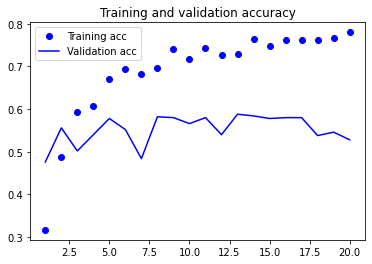

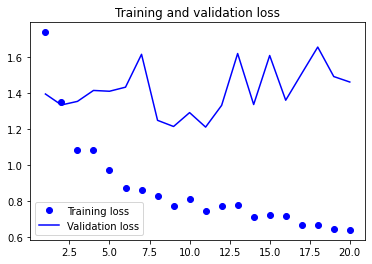

In [28]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

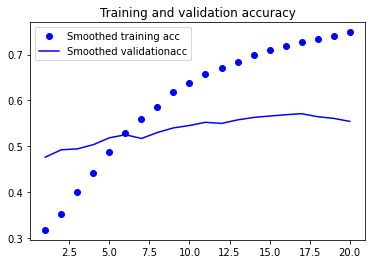

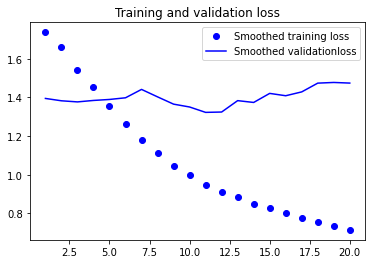

In [29]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 -factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validationacc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validationloss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
test_generator = test_datagen.flow_from_directory(ins_new_dir[2],
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator,steps=50)
print('test acc:', test_acc)

Found 2116 images belonging to 6 classes.
test acc: 0.6570000052452087


In [36]:
#for test images the samples aren't enough so doing the confusion matrix with validation images
import numpy as np
batch_size=20
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(validation_generator, validation_img// batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[ 53  68  41  85  52  30]
 [ 60  94  67 125  67  57]
 [ 54  73  55  62  65  34]
 [ 39  76  53  84  49  34]
 [ 43  84  47  75  69  34]
 [ 40  59  36  77  49  33]]
